In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv(r'C:\Users\thisi\Desktop\darko\Data Science\netflix\mymoviedb_.csv')

In [135]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0
1,2022-01-03,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022.0
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021.0
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9826 non-null   float64       
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
 9   Release_Year       9827 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 768.6+ KB


In [139]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [138]:
df.duplicated().sum()

8

In [164]:
df.describe()

,Popularity,Vote_Count,Release_Year
count,25551.000000,25551.000000,25551.000000
mean,41.972953,1519.075731,2005.869516
std,113.760723,2752.039168,15.486277
min,13.354000,1.000000,1902.000000
25%,16.363000,172.000000,2000.000000
50%,21.844000,498.000000,2010.000000
75%,36.461000,1525.000000,2017.000000
max,5083.954000,31077.000000,2022.000000


# Data Pre-processing

In [141]:
df['Vote_Count'] = df['Vote_Count'].astype(float)
df['Vote_Average'] = df['Vote_Average'].astype(float)

In [140]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

In [129]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [134]:
print(df['Release_Date'].dtype)

datetime64[ns]


In [133]:
df['Release_Year'] = df['Release_Date'].dt.year

# Dropping the columns

In [143]:
cols = ['Overview','Original_Language','Poster_Url','Release_Date']

In [145]:
df.drop(cols, axis=1, inplace=True)

In [146]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction",2021.0
1,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller",2022.0
2,No Exit,2618.087,122.0,6.3,Thriller,2022.0
3,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy",2021.0
4,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War",2021.0


In [147]:
df.columns

Index(['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre',
       'Release_Year'],
      dtype='object')

In [148]:
def categroized_col(df, col, labels):
    
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates= 'drop')
    return df

In [149]:
labels = ['not_popular','below_average','average','popular']

categroized_col(df,'Vote_Average', labels)
    
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [150]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction",2021.0
1,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller",2022.0
2,No Exit,2618.087,122.0,below_average,Thriller,2022.0
3,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy",2021.0
4,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War",2021.0


In [151]:
df['Vote_Average'].value_counts()

not_popular      2467
popular          2450
average          2411
below_average    2398
Name: Vote_Average, dtype: int64

In [152]:
df.dropna(inplace = True)
df.isna().sum()

Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Release_Year    0
dtype: int64

In [153]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action,2021.0
1,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure,2021.0
2,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction,2021.0
3,The Batman,3827.658,1151.0,popular,Crime,2022.0
4,The Batman,3827.658,1151.0,popular,Mystery,2022.0


In [154]:
# casting column in category

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25551 non-null  object  
 1   Popularity    25551 non-null  float64 
 2   Vote_Count    25551 non-null  float64 
 3   Vote_Average  25551 non-null  category
 4   Genre         25551 non-null  category
 5   Release_Year  25551 non-null  float64 
dtypes: category(2), float64(3), object(1)
memory usage: 849.4+ KB


In [156]:
df.nunique()

Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
Release_Year     100
dtype: int64

# Data Visualization

In [157]:
sns.set_style('whitegrid')

In [107]:
# What is the most frequent genre of movies released on Netflix ?

In [158]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

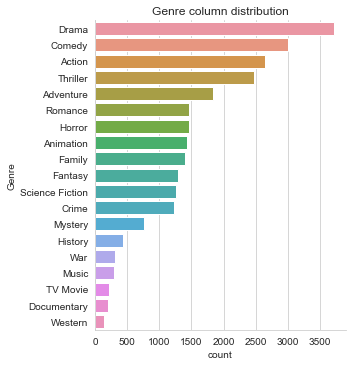

In [159]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
order = df['Genre'].value_counts().index)

plt.title('Genre column distribution')
plt.show()


In [113]:
# which has highest votes in votes_average column ?

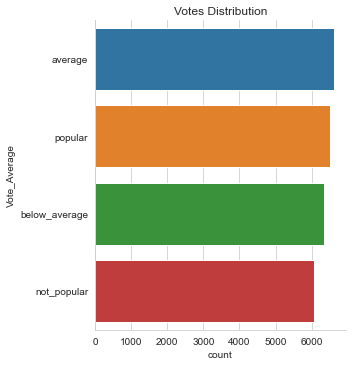

In [160]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index)

plt.title('Votes Distribution')
plt.show()

In [ ]:
# which movie got the highest popluarity and whats its genre ?

In [161]:
df[df['Popularity'] == df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action,2021.0
1,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure,2021.0
2,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction,2021.0


In [ ]:
# which movie got the lowest popluarity and whats its genre ?

In [162]:
df[df['Popularity'] == df['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25545,The United States vs. Billie Holiday,13.354,152.0,average,Music,2021.0
25546,The United States vs. Billie Holiday,13.354,152.0,average,Drama,2021.0
25547,The United States vs. Billie Holiday,13.354,152.0,average,History,2021.0
25548,Threads,13.354,186.0,popular,War,1984.0
25549,Threads,13.354,186.0,popular,Drama,1984.0
25550,Threads,13.354,186.0,popular,Science Fiction,1984.0


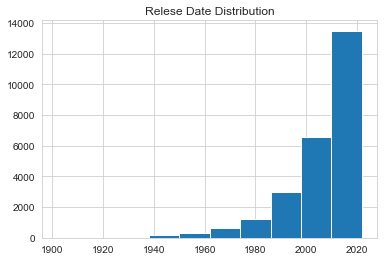

In [163]:
df['Release_Year'].hist()
plt.title('Relese Date Distribution')
plt.show()

# Conclusion

In [ ]:
Q. what is the frequent genre in this data set?
A. Drama appeared more than 14% of the time among 19 other Genre.

Q. What genre has the highest Votes?
A. We have 15.5% of our Dataset with popular votes which is 6520 row. Drama has the highest votes more than 18.5% of movie popularity. 

Q. which movie got the highest popularity and whats its Genre?
A. Spider-Man: No Way Home and its genre are Adventure, Action, Science Fiction

Q. which movie got the lowest popularity and whats its Genre?
A. The United States vs. Billie Holiday & Threads their Genre Drama, War, History, Music, Science fiction

Q. which year has the most filmed movie?
A. Year 2020